# Segmentação Pulmonar
Se apresenta um algoritmo de segmentação pulmonar, baseado nos perfis de intensidade dos pixeis das imagens de raios-x de pulmões saudáveis e com tuberculosis. 

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%reload_ext watermark
%watermark -a "César S. Hooper/ Enero 2022" --iversions
!python --version

Author: César S. Hooper/ Enero 2022

pandas    : 1.2.4
numpy     : 1.19.5
cv2       : 4.5.4-dev
matplotlib: 3.3.4

Python 3.8.8


In [3]:
# paths das imagens
path1 = 'C:/Users/Cesar Hooper/Desktop/github/salud/rx_imagenes/imagenes'
path2 = 'C:/Users/Cesar Hooper/Desktop/miscelaneo/temporal'

In [4]:
imagens1 = [img for img in os.listdir(path1)]

In [5]:
imagens2 = [img for img in os.listdir(path2) if img[-3:]=='png']

Dentro da área de aprendizagem de máquina (Machine Learning, Deep Learning), a visão computacional e a segmentação de imagens é uma das áreas de maior importancia na hora de criar algoritmos para o aprendizagem. 

A segmentação de uma imagem consiste em fazer com que o algoritmo seja capaz de reconhecer quais imagens estão dentro de uma imagen maior. Por exemplo, numa paisagem, reconhecer os animais presentes, árvores, pessoas, ou objetos.

Neste notebook, vamos segmentar os pulmões numa imagem de raios-x.

As fontes de imagens são Chinaset e Montgomeryset.

In [7]:
# vamos escolher um pulmão doente '1'
im_doent = [im for im in imagens1 if im[-5]=='1']
len(im_doent)

15

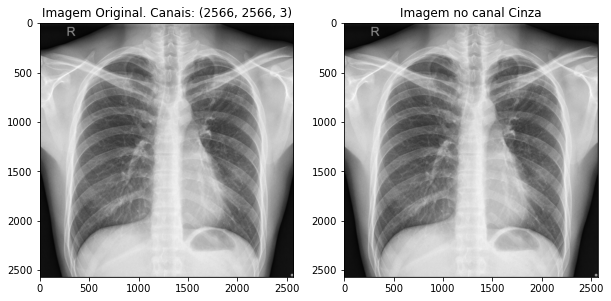

In [8]:
img = cv2.imread(path1 + '/' + im_doent[0])
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Imagem Original. Canais: ' + str(img.shape))
plt.subplot(1,2,2)
plt.imshow(cinza, cmap='gray')
plt.title('Imagem no canal Cinza')
plt.show()

O procedimento consiste em fazer, em primeiro lugar, uma umbralização da imagem.
Essa imagem tem três canais de cores, no formato RGB. A gente vai deixar apenas um canal, no cinza.

No canal cinza, cada pixel pode ter intensidades que vão entre 0 e 255, em que a intensidade 0 é o negro e 255 branco.

Para umbralizar, usamos a função **cv2.threshold(cinza, n, 255, cv2.THRESH_BINARY)**. Essa função trasforma uma imagem de muitos tons de cinza em uma imagem binaria. Dessa maneira, qualquer pixel cuja intensidade esteja abaixo do valor **n** fica negro, os valores acima, ficam brancos. 

Mais detalhes consultar a seguinte documentação
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

**Umbralização**

Vamos pegar uma imagem saudável e fazer umbralização com diferentes valores do umbral **n**, entre 120 e 230. O objetivo é encontrar o melhor valor de umbralização da imagem.

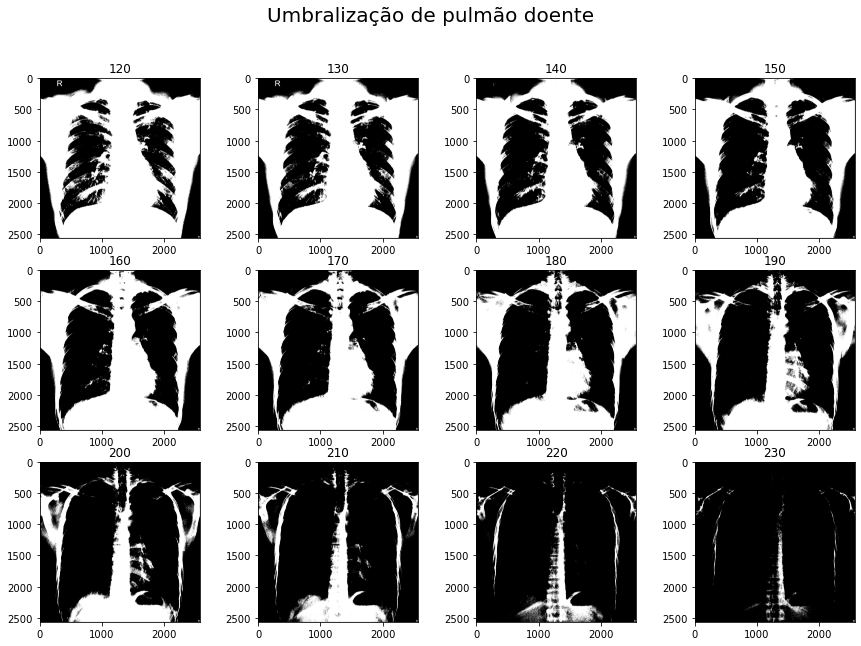

In [11]:
k = 1
plt.figure(figsize=(15,10))
for n in np.arange(120, 240, 10):

    _, umbral = cv2.threshold(cinza, n, 255, cv2.THRESH_BINARY)
    plt.subplot(3, 4, k)
    plt.imshow(umbral, cmap='gray')
    plt.title(n)
    plt.suptitle('Umbralização de pulmão doente ', fontsize=20)
    k += 1

Essa é uma imagem de um pulmão com tuberculose. O melhor umbral parece estar entre 150 e 180.

Vamos ver a umbralização de um pulmão saudável.

In [13]:
# vamos escolher um pulmão saudavel '0'
im_saud = [im for im in imagens1 if im[-5]=='0']

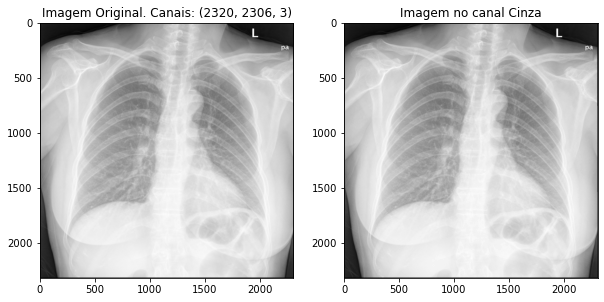

In [14]:
name = np.random.choice(imagens1, 1)
img = cv2.imread(path1 + '/' + im_saud[0])
cinza2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Imagem Original. Canais: ' + str(img.shape))
plt.subplot(1,2,2)
plt.imshow(cinza2, cmap='gray')
plt.title('Imagem no canal Cinza')
plt.show()

E agora a umbralização

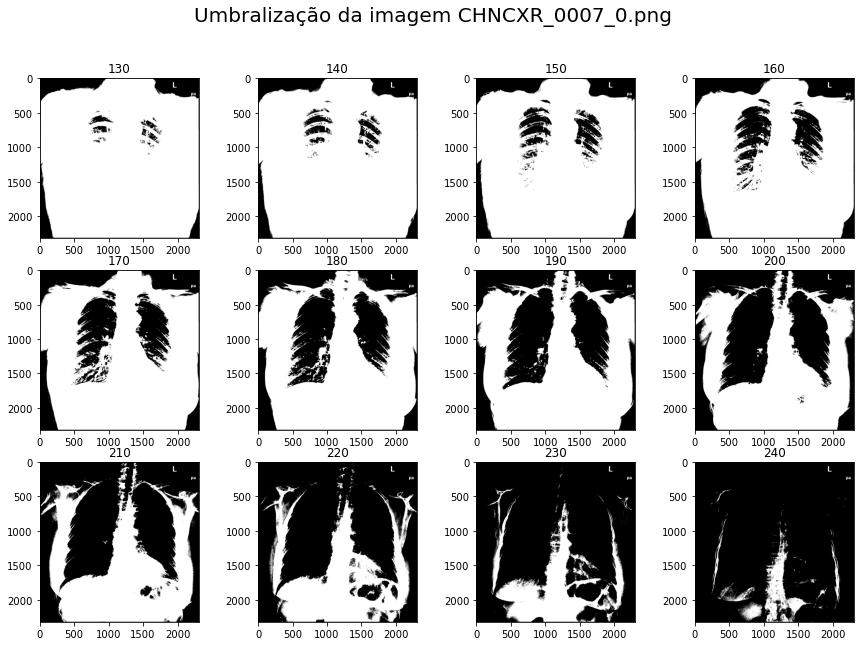

In [16]:
k = 1
plt.figure(figsize=(15,10))
for n in np.arange(130, 250, 10):

    _, umbral = cv2.threshold(cinza2, n, 255, cv2.THRESH_BINARY)
    plt.subplot(3, 4, k)
    plt.imshow(umbral, cmap='gray')
    plt.title(n)
    plt.suptitle('Umbralização da imagem ' + str(im_saud[0]), fontsize=20)
    k += 1

Vamos escolher 5 imagens de pulmões saudáveis e fazer umbralização entre 150 e 190.

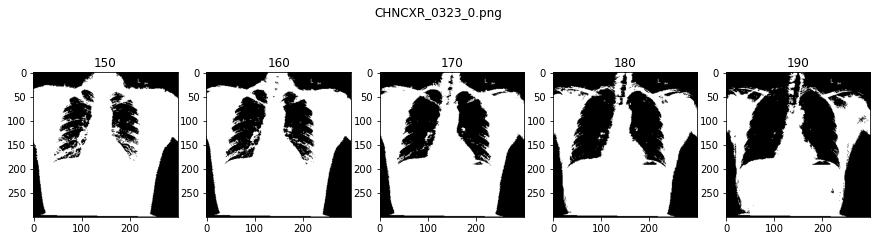

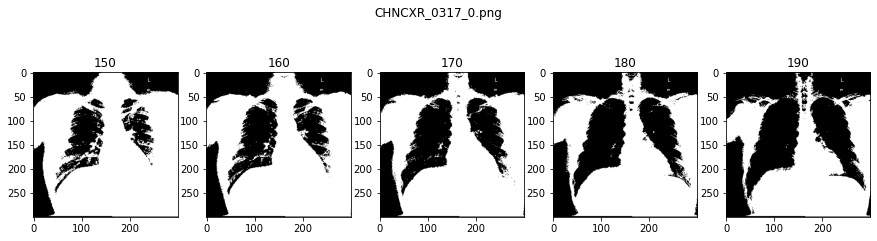

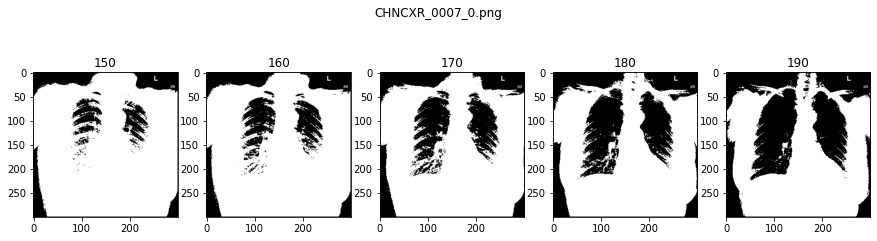

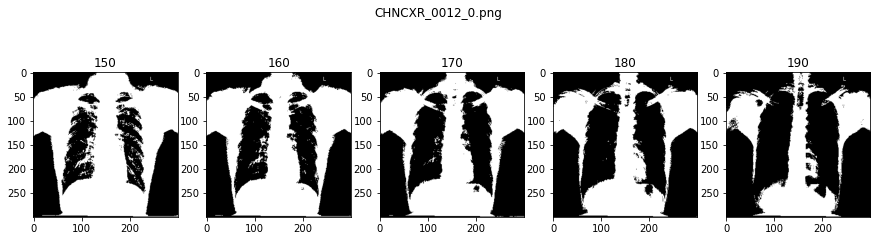

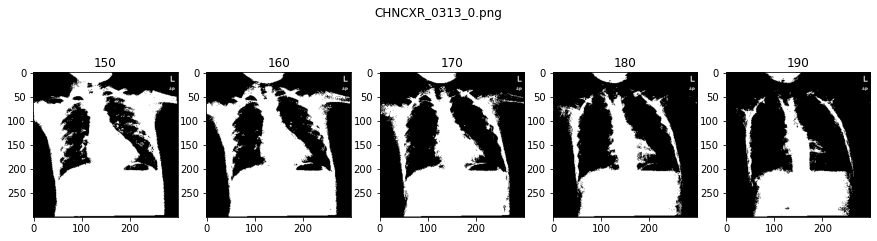

In [19]:
# escolhe 5 pulmões saudaveis e fazer umbralização nos rangos 150-190
# as dimensões das imagens são fixadas em 300x300 pixeis
imag_saudaveis = np.random.choice(im_saud, 5)
for img in imag_saudaveis:
    imagem = cv2.imread(path1 + '/' + img)
    imagem = cv2.resize(imagem, (300,300), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
    k = 1

    plt.figure(figsize=(15,4))
    for n in np.arange(150, 200, 10):

        _, umbral = cv2.threshold(gray, n, 255, cv2.THRESH_BINARY)
        plt.subplot(1, 5, k)
        plt.imshow(umbral, cmap='gray')
        plt.title(n)
        plt.suptitle(img)
        k += 1

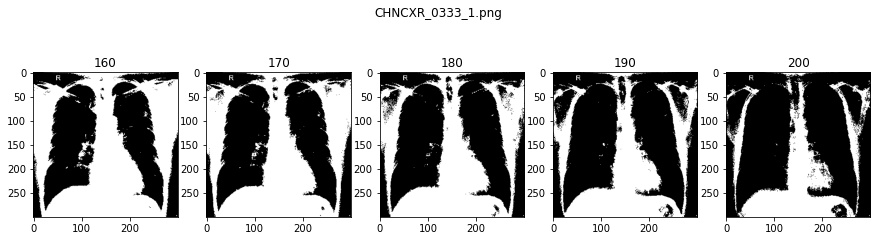

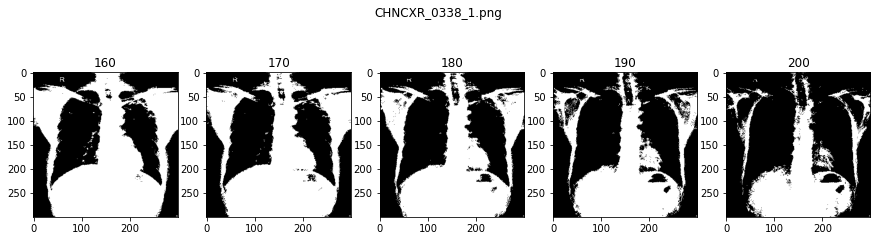

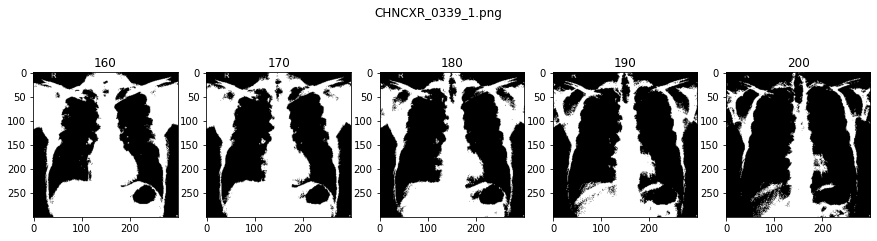

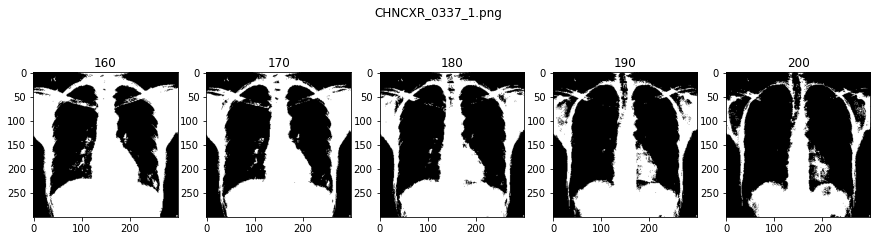

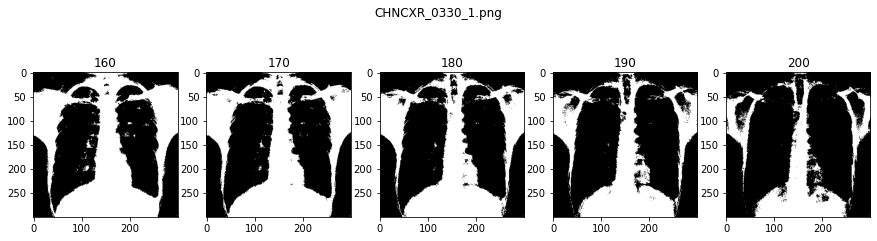

In [20]:
# escolhe 5 pulmões doentes e faz a umbralização nos rangos 160-200
for img in np.random.choice(im_doent, 5):
    imagem = cv2.imread(path1 + '/' + img)
    # as dimensões das imagens são fixadas em 300x300 pixeis
    imagem = cv2.resize(imagem, (300,300), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
    k = 1

    plt.figure(figsize=(15,4))
    for n in np.arange(160, 210, 10):

        _, umbral = cv2.threshold(gray, n, 255, cv2.THRESH_BINARY)
        plt.subplot(1, 5, k)
        plt.imshow(umbral, cmap='gray')
        plt.title(n)
        plt.suptitle(img)
        k += 1

Como é possível perceber, não é fãcil escolher o melhor limite para a umbralização, porque este muda entre um pulmão saudável e outro doente, mas também muda entre pulmões com a mesma classificação. 

Construir um algoritmo adaptativo seria a melhor opção, mas aparentemente, sempre vai ser necessário entregar critérios "a dedo" ao algoritmo. 

Uma vez que se escolheu o parâmetro de umbralização, o seguinte passo é contar o número de píxeis brancos. Lembremos que na umbralização, temos apenas duas intensidades na imagem: 0 e 255. Então, vamos contar a quantidade de píxeis com valor 255 na direção vertical, fileira por fileira. Mesmo assim, na horizontal, vamos contar a quantidade de píxeis brancos, coluna por coluna.

Para simplificar o trabalho, vamos fixar as dimensões das imagens em 300x300 píxeis.

Vamos escolher um valor umbral. Para pulmões doentes, 165, e para pulmões saudáveis, 180. Vamos fazer um gráfico: o número de píxeis brancos na direção vertical com o nome de "perfil Vertical", e na horizontal "perfil horizontal". 

Entre os valores de maior número de pixeis brancos se encontram os pulmões. Esses valores vão nos ajudar a definir os limites da segmentação. 

Mas, antes, vamos falar de algumas funções úteis. 

A função filtro vai nos ajudar a encontrar o valor máximo do perfil, mas dentro de um limite mínimo e máximo.

In [24]:
def filtro(arreglo, valor_min, valor_max):
    
    """Función para determinar si arreglo está contenido en Rango---
    Retorna lista con valores de arreglo contenidos en rango"""
    
    rango = np.arange(valor_min, valor_max)
    
    
    filtrados = []
    
    if len(arreglo) == 1: filtrados.append(max(arreglo))
    else:
        
        for k in arreglo:
            if k in rango: filtrados.append(k)
                
    return max(filtrados)

A função perfiles cria os perfis, tanto vertical como horizontal. 

In [25]:
def perfiles(umbral):
    
    """retorna perfil_horizontal, perfil_vertical ---
    La imagen debe llegar redimensionada y umbralizada"""
    
    vperfil = dict()
    hperfil = dict()
    for k in range(umbral.shape[0]):
        
        # perfil vertical
        vunique, vcounts = np.unique(umbral[k, :], return_counts=True)
        
        if 255 in (vunique): vperfil[k] = vcounts[vunique==255][0]
        else: vperfil[k] = 0
    for k in range(umbral.shape[1]):
        
                 
        # perfil horizontal
        hunique, hcounts = np.unique(umbral[:, k], return_counts=True)
        if 255 in (hunique): hperfil[k] = hcounts[hunique==255][0]
        else: hperfil[k] = 0
        
    return hperfil, vperfil

Finalmente, a função coordenadas entrega as coordenadas do retângulo da segmentação. O limite superior esquerdo e o limite inferior direito. 

In [26]:
def coordenadas(vert, horz): 
    
    """Función que retorna las coordenadas de los vértices superior izquierdo
    e inferior derecho del rectángulo de segmentación"""
    
    vertical = list(vert.values())
    horizontal = list(horz.values())
    
    # vertical y1, y2
    izq_arr, izq_abj = 30, 100
    der_arr, der_abj = 200, 280
    
    vmax1 = max(vertical[izq_arr: izq_abj]) # [10:100]
    vmax2 = max(vertical[der_arr: der_abj])
    y1 = filtro(list(np.where(vertical==vmax1)[0]), izq_arr, izq_abj)
    y2 = filtro(list(np.where(vertical==vmax2)[0]), der_arr, der_abj)
    
    # horizontal x1, x2
    izq_inf, izq_sup = 10, 100
    der_inf, der_sup = 200, 270
    
    hmax1 = max(horizontal[izq_inf:izq_sup])
    hmax2 = max(horizontal[der_inf:der_sup])
    x1 = filtro(list(np.where(horizontal==hmax1)[0]), izq_inf, izq_sup)
    x2 = filtro(list(np.where(horizontal==hmax2)[0]), der_inf, der_sup)
    
    
    return x1, x2, y1, y2

Vamos aplicar todas essas funções em três imagens saudáveis e três imagens doentes. 

In [22]:
# seleção de 3 imagens saudáveis e 3 doentes
ims_sau = ['CHNCXR_0314_0.png', 'CHNCXR_0319_0.png', 'CHNCXR_0323_0.png']
ims_doe = ['CHNCXR_0464_1.png', 'CHNCXR_0331_1.png', 'CHNCXR_0329_1.png']
listas = [ims_sau, ims_doe]

37 268 72 251


<Figure size 1080x720 with 0 Axes>

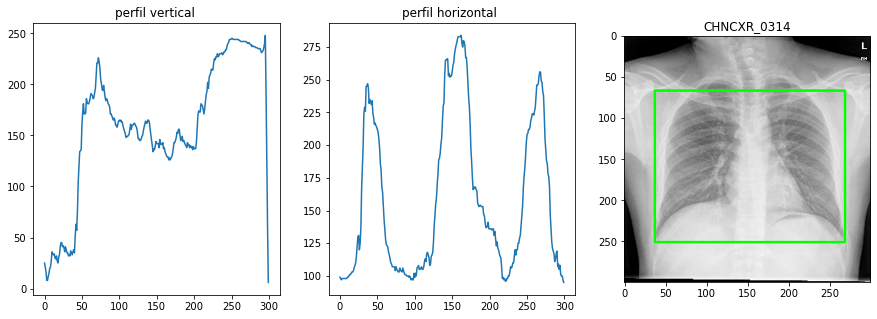

57 226 56 251


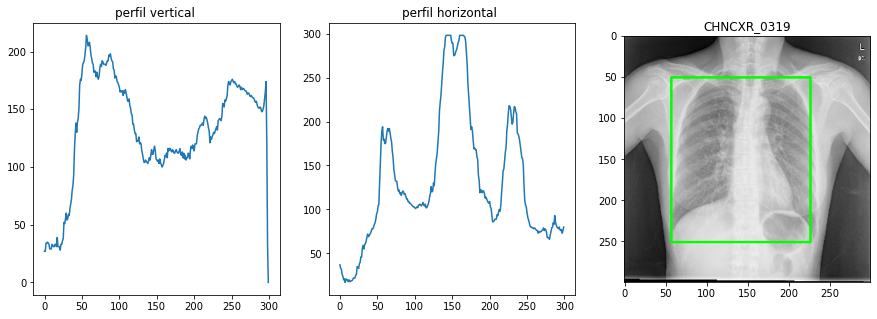

31 234 53 201


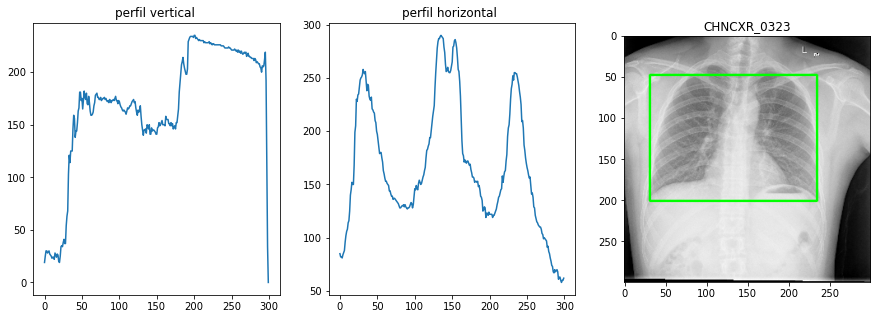

In [27]:
# Segmentação de imagens saudáveis
k = 1
plt.figure(figsize=(15,10))
for nome in ims_sau:
    
    im = cv2.imread(path1 + '/' + nome)
    im = cv2.resize(im, (300,300), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    
    
    _, umbral = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
    hperfil, vperfil = perfiles(umbral)
    
    auxframe = im.copy()
    
    # coordenadas del  centro:  x1, x2, y1, y2 = coordenadas(vert, horz)
    x1, x2, y1, y2 = coordenadas(vperfil, hperfil)
    print(x1, x2, y1, y2) 
    # rectangulo
    cv2.rectangle(im, (x1, y1-5), (x2, y2), (0,255,0),2)
    imagem = auxframe[y1:y2, x1:x2]
    
    # grafica perfiles
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(list(vperfil.keys()), list(vperfil.values()))
    plt.title('perfil vertical ')
    plt.subplot(1, 3, 2)
    plt.plot(list(hperfil.keys()), list(hperfil.values()))
    plt.title('perfil horizontal ')
    plt.subplot(1, 3, 3)
    plt.imshow(im, cmap='gray')
    plt.title(nome[0:-6])
    plt.show()
    

**Segmentação de imagens de pulmão doente**

43 269 55 200


<Figure size 1080x720 with 0 Axes>

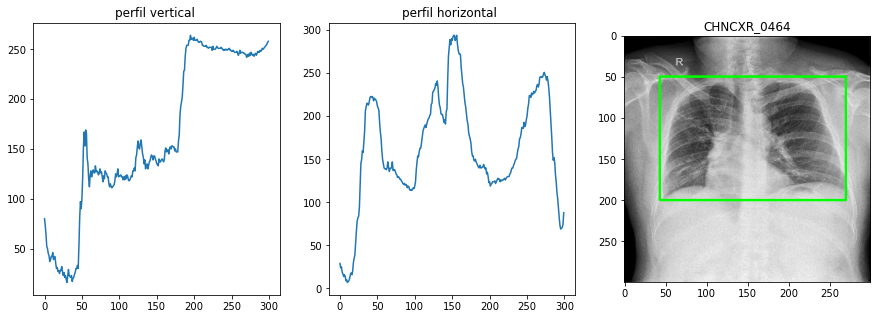

36 265 43 276


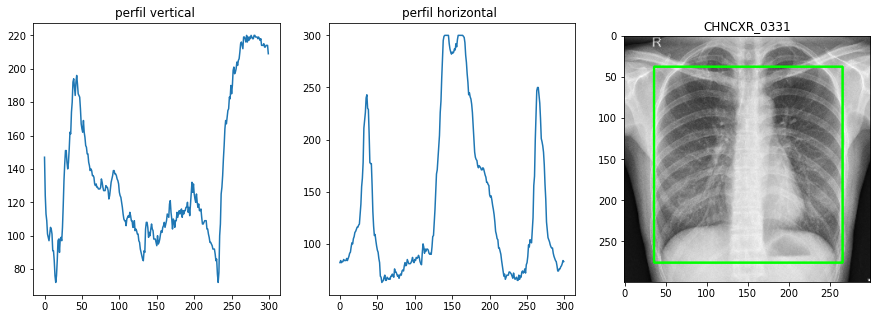

45 257 49 279


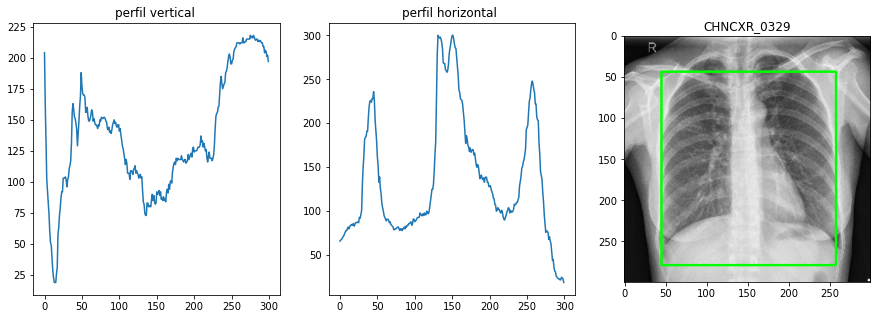

In [95]:
k = 1
plt.figure(figsize=(15,10))
for nome in ims_doe:
    
    im = cv2.imread(path1 + '/' + nome)
    im = cv2.resize(im, (300,300), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    
    
    _, umbral = cv2.threshold(gray, 165, 255, cv2.THRESH_BINARY)
    hperfil, vperfil = perfiles(umbral)
    
    auxframe = im.copy()
    
    # coordenadas del  centro:  x1, x2, y1, y2 = coordenadas(vert, horz)
    x1, x2, y1, y2 = coordenadas(vperfil, hperfil)
    print(x1, x2, y1, y2) 
    # rectangulo
    cv2.rectangle(im, (x1, y1-5), (x2, y2), (0,255,0),2)
    imagem = auxframe[y1:y2, x1:x2]
    
    # grafica perfiles
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(list(vperfil.keys()), list(vperfil.values()))
    plt.title('perfil vertical ')
    plt.subplot(1, 3, 2)
    plt.plot(list(hperfil.keys()), list(hperfil.values()))
    plt.title('perfil horizontal ')
    plt.subplot(1, 3, 3)
    plt.imshow(im, cmap='gray')
    plt.title(nome[0:-6])
    plt.show()
    

A única mudança entre pulmões saudáveis e doentes é a escolha do parâmetro de umbralização **n**.

No gráfico do perfil horiozontal aparecem três picos de píxeis brncos. O central representa a localização da coluna vertebral; os laterais são o limites laterais do rectángulo de segmentação, os valores (y1 e y2).

Por outro lado, os picos do perfil lateral são, aproximadamente, os limites verticais do rectángulo de segmentação. Mas é preciso comentar que não é trivial determinar tais limites verticais. Existe muita imprecisão no perfil vertical. Porém, é possivel encontrar os valores aproximados.

Agora, vamos usar o algoritmo de segmentação no Montgomery set. Vamos escolher três imagens saudáveis e três doentes.

In [30]:
ims2_sau = ['MCUCXR_0069_0.png', 'MCUCXR_0100_0.png', 'MCUCXR_0060_0.png']
ims2_doe = ['MCUCXR_0104_1.png', 'MCUCXR_0113_1.png', 'MCUCXR_0140_1.png']

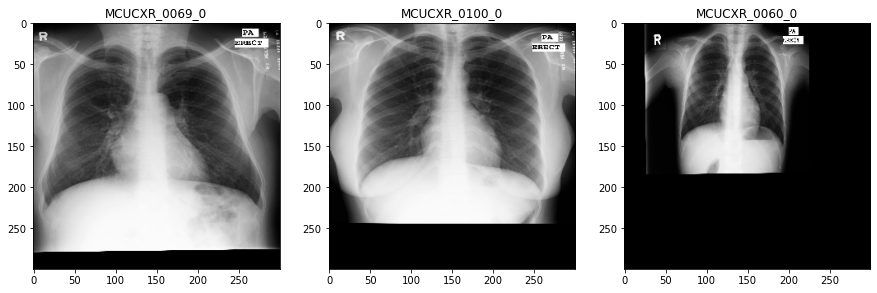

In [31]:
# algumas imagens do data set montgomery
k = 1
plt.figure(figsize=(15,10))
for nome in ims2_sau:
    im = cv2.imread(path2 + '/' + nome, 0)
    im = cv2.resize(im, (300, 300))
    plt.subplot(1, 3, k)
    plt.imshow(im, cmap='gray')
    plt.title(nome[0:-4])
    k += 1
    

Vamos tirar as bordas das imagens. Usamos o seguinte algoritmo

In [28]:
def elimina_bordes(imagen_gris):
    """Elimina os bordes pretos das imágens"""
    
    yoyo = cv2.resize(imagen_gris, (500, 500)) 
    k = 0
    while True:
        _ , vcant = np.unique(yoyo[:, k], return_counts=True)
        filas, _ = yoyo.shape
        if vcant[0]==filas:
            yoyo = np.delete(yoyo, k, axis=1)
        else:
            k += 1

        if k == yoyo.shape[1]: break  

    q = 0
    while True:
        _, hcant = np.unique(yoyo[q, :], return_counts=True)
        _, columnas = yoyo.shape
        if hcant[0]==columnas:
            yoyo = np.delete(yoyo, q, axis=0)
        else:
            q += 1

        if q == yoyo.shape[0]: break
    return yoyo


    


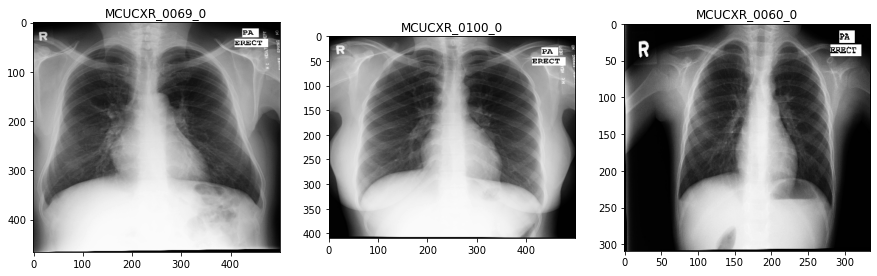

In [32]:
# Cortar bordes das imagens saudaveis
k = 1
plt.figure(figsize=(15,10))
for nome in ims2_sau:
    im = cv2.imread(path2 + '/' + nome, 0)
    im_cut = elimina_bordes(im)
    plt.subplot(1, 3, k)
    plt.imshow(im_cut, cmap='gray')
    plt.title(nome[0:-4])
    k += 1

10 263 43 254


<Figure size 1080x720 with 0 Axes>

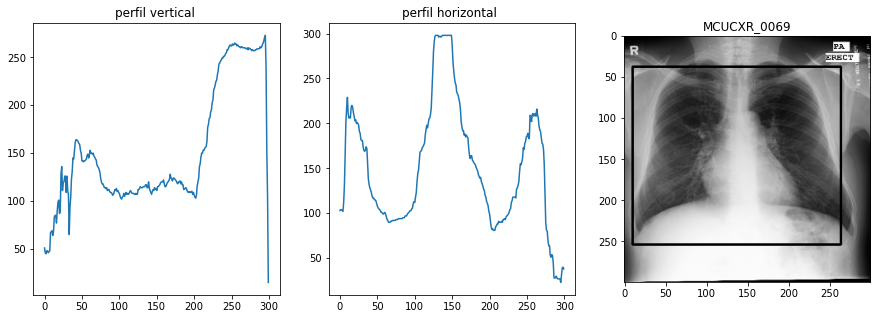

44 253 33 237


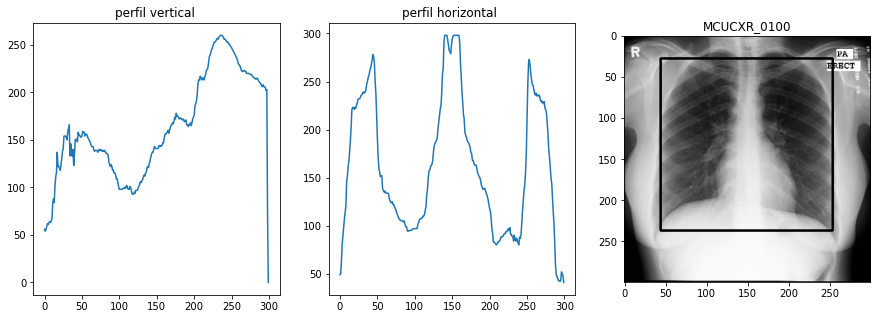

79 251 87 253


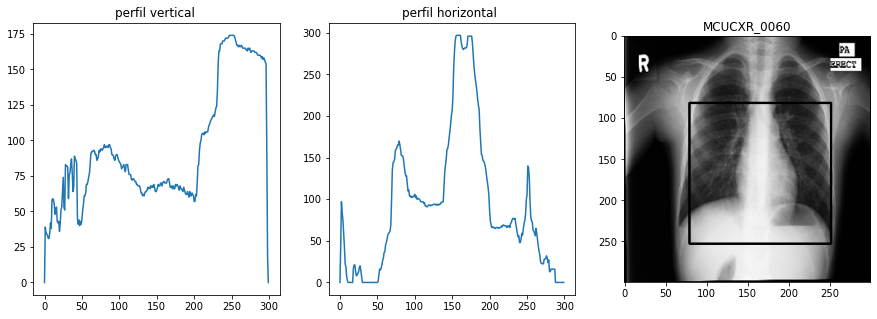

In [33]:
# segmentação das imagens saudáveis do Montgomery set
k = 1
plt.figure(figsize=(15,10))
for nome in ims2_sau:
    
    im = cv2.imread(path2 + '/' + nome, 0)
    im_cut = elimina_bordes(im)
    im_cut = cv2.resize(im_cut, (300,300), interpolation=cv2.INTER_CUBIC)
    
    
    
    _, umbral = cv2.threshold(im_cut, 140, 255, cv2.THRESH_BINARY)
    hperfil, vperfil = perfiles(umbral)
    
    auxframe = im_cut.copy()
    
    # coordenadas del  centro:  x1, x2, y1, y2 = coordenadas(vert, horz)
    x1, x2, y1, y2 = coordenadas(vperfil, hperfil)
    print(x1, x2, y1, y2) 
    # rectangulo
    cv2.rectangle(im_cut, (x1, y1-5), (x2, y2), (0,255,0),2)
    imagem = auxframe[y1:y2, x1:x2]
    
    # grafica perfiles
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(list(vperfil.keys()), list(vperfil.values()))
    plt.title('perfil vertical ')
    plt.subplot(1, 3, 2)
    plt.plot(list(hperfil.keys()), list(hperfil.values()))
    plt.title('perfil horizontal ')
    plt.subplot(1, 3, 3)
    plt.imshow(im_cut, cmap='gray')
    plt.title(nome[0:-6])
    plt.show()
    

29 262 37 279


<Figure size 1080x720 with 0 Axes>

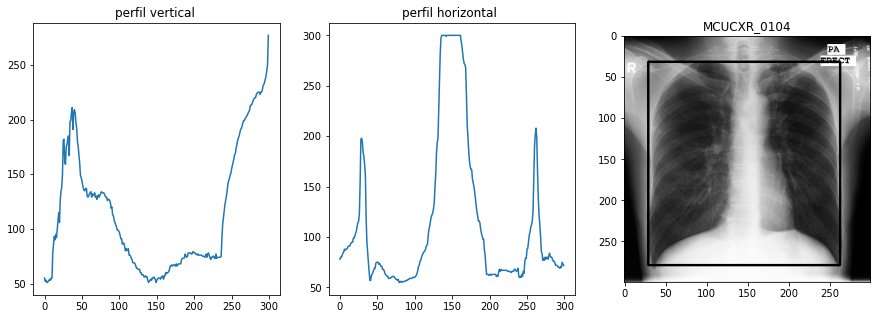

34 237 76 253


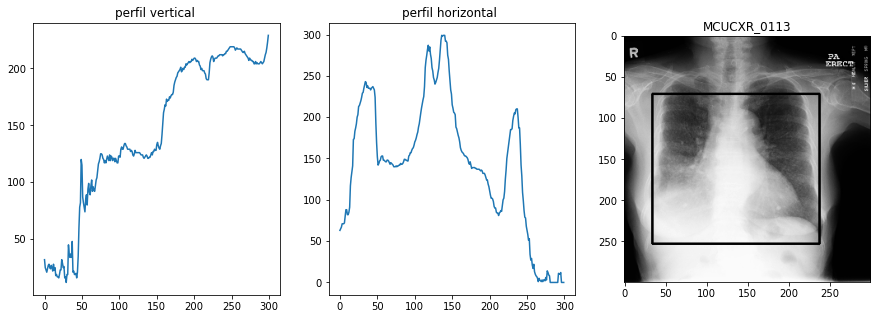

32 255 96 278


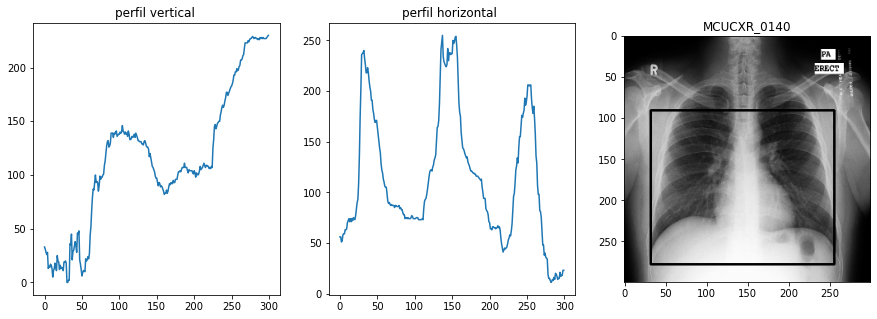

In [34]:
# segmentação das imagens com doença do Montgomery set
k = 1
plt.figure(figsize=(15,10))
for nome in ims2_doe:
    
    im = cv2.imread(path2 + '/' + nome, 0)
    im_cut = elimina_bordes(im)
    im_cut = cv2.resize(im_cut, (300,300), interpolation=cv2.INTER_CUBIC)
    
    
    
    _, umbral = cv2.threshold(im_cut, 140, 255, cv2.THRESH_BINARY)
    hperfil, vperfil = perfiles(umbral)
    
    auxframe = im_cut.copy()
    
    # coordenadas del  centro:  x1, x2, y1, y2 = coordenadas(vert, horz)
    x1, x2, y1, y2 = coordenadas(vperfil, hperfil)
    print(x1, x2, y1, y2) 
    # rectangulo
    cv2.rectangle(im_cut, (x1, y1-5), (x2, y2), (0,255,0),2)
    imagem = auxframe[y1:y2, x1:x2]
    
    # grafica perfiles
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(list(vperfil.keys()), list(vperfil.values()))
    plt.title('perfil vertical ')
    plt.subplot(1, 3, 2)
    plt.plot(list(hperfil.keys()), list(hperfil.values()))
    plt.title('perfil horizontal ')
    plt.subplot(1, 3, 3)
    plt.imshow(im_cut, cmap='gray')
    plt.title(nome[0:-6])
    plt.show()
    

### Conclusão

O método de segmentação proposto consegue localizar os pulmões. Mas ainda seria preciso melhorar o método de escolha dos limites nos gráficos dos perfis horizontal e principalmente vertical. 
Fica para outro notebook melhorar as aproximações dadas aqui.
Contudo, a segmentação contém uma porcentagem importante do pulmão.

# FIM